# Analyse prédictive des cours des actions FAANG 

### Importation des packages 

Plan 
Introduction 
1- Récupération et traitement de données
2- Analyse descriptive et visualisation 
3- Prédiction et modélisation 
Conclusion 

In [2]:

#Manipulation de données 
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

#Date
from datetime import datetime

#Extraction de données 
import yfinance as yf

### Data downloading


In [14]:
#Chargement de l'historique des cours des actions de FAANG depuis le site yahoo finance de 01/01/2018.  
label = ['AAPL','GOOG','MSFT','AMZN','NFLX']
ddebut = datetime(2019,12,10) 
dfin = datetime.now()
for x in label :
    globals()[x] = yf.download(x,ddebut,dfin)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-09,67.500000,67.699997,66.227501,66.730003,65.621384,128042400
2019-12-10,67.150002,67.517502,66.464996,67.120003,66.004898,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.567886,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.737518,137310400
2019-12-13,67.864998,68.824997,67.732498,68.787498,67.644707,133587600
...,...,...,...,...,...,...
2020-12-07,122.309998,124.570000,122.250000,123.750000,123.750000,86712000
2020-12-08,124.370003,124.980003,123.089996,124.379997,124.379997,82225500
2020-12-09,124.529999,125.949997,121.000000,121.779999,121.779999,115089200


### Data cleaning


In [16]:
action = [AAPL,GOOG,MSFT,AMZN,NFLX]
for x in action :
    x.drop_duplicates(keep = 'first', inplace=True)
    x.dropna()

### Descriptive Statistics

In [31]:
for x in action:
    print(x.describe())
    

### Data Visualisation


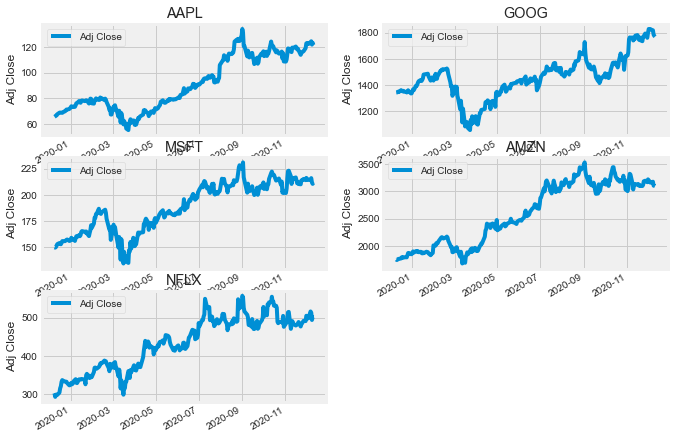

In [17]:
# visualisation des cours des actions pour réfléchir à de premières intuitions.
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, x in enumerate( action, 1):
    plt.subplot(3,2,i)
    x['Adj Close'].plot(legend = True, figsize = (10,5))
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(label[i - 1])


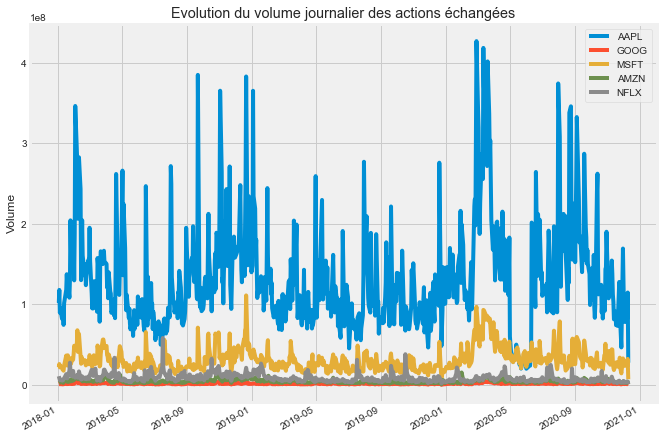

In [33]:
# visualisation du volume journalier des actions échangées.
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, x in enumerate( action, 1):
    x['Volume'].plot(legend = True, figsize = (10,5), label=f"{label[i - 1]}")
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title("Evolution du volume journalier des actions échangées")


In [34]:
# Récupération des rentabilités
for x in action :
    x['Daily Return'] = x['Adj Close'].pct_change() 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Google')

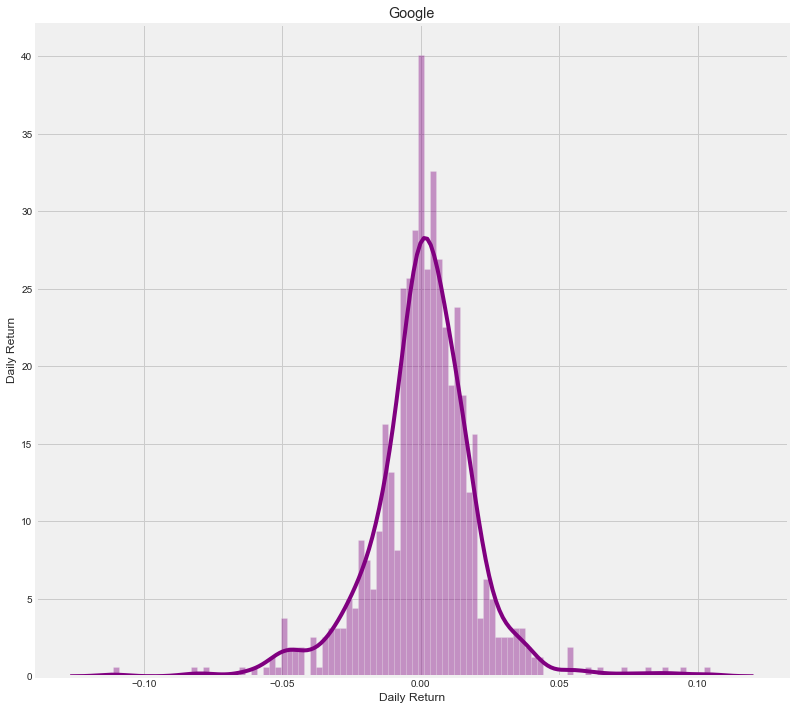

In [58]:
# Visualisation la distribution des rentabilités
plt.figure(figsize=(12, 12))
sns.distplot(GOOG['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title(f'Google')

Les rendement des actifs sont en moyenne nulles 

In [62]:
# récupération de la matrice des rentabilités des 5 actions 
Matcours = yf.download(label, ddebut, dfin)['Adj Close']
Matrend = Matcours.pct_change()
Matrend.tail()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2020-12-04,-0.005613,-0.007578,0.000668,0.000560,0.001588
2020-12-07,0.012270,-0.001448,-0.004655,-0.000327,0.035059
2020-12-08,0.005091,0.006108,-0.000511,0.008027,-0.006049
2020-12-09,-0.020904,-0.023004,-0.018927,-0.019490,-0.037179
2020-12-10,0.011661,-0.001582,-0.007979,-0.005571,0.011771


          AAPL      AMZN      GOOG      MSFT      NFLX
AAPL  1.000000  0.658388  0.697769  0.774198  0.513694
AMZN  0.658388  1.000000  0.687636  0.736533  0.672202
GOOG  0.697769  0.687636  1.000000  0.805414  0.550473
MSFT  0.774198  0.736533  0.805414  1.000000  0.587575
NFLX  0.513694  0.672202  0.550473  0.587575  1.000000


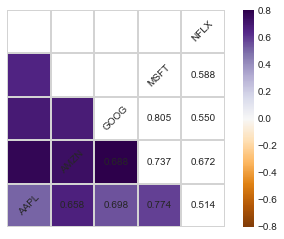

In [63]:
# Matrice des corrélations
corr = Matrend.corr()
print(corr)
# Les coefficients de corrélation dans le triangle en bas
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Création de la matrice
fig, ax = plt.subplots()

# Affectation à chaque case sa valeur de coefficient de corrélation on utilisant mask
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

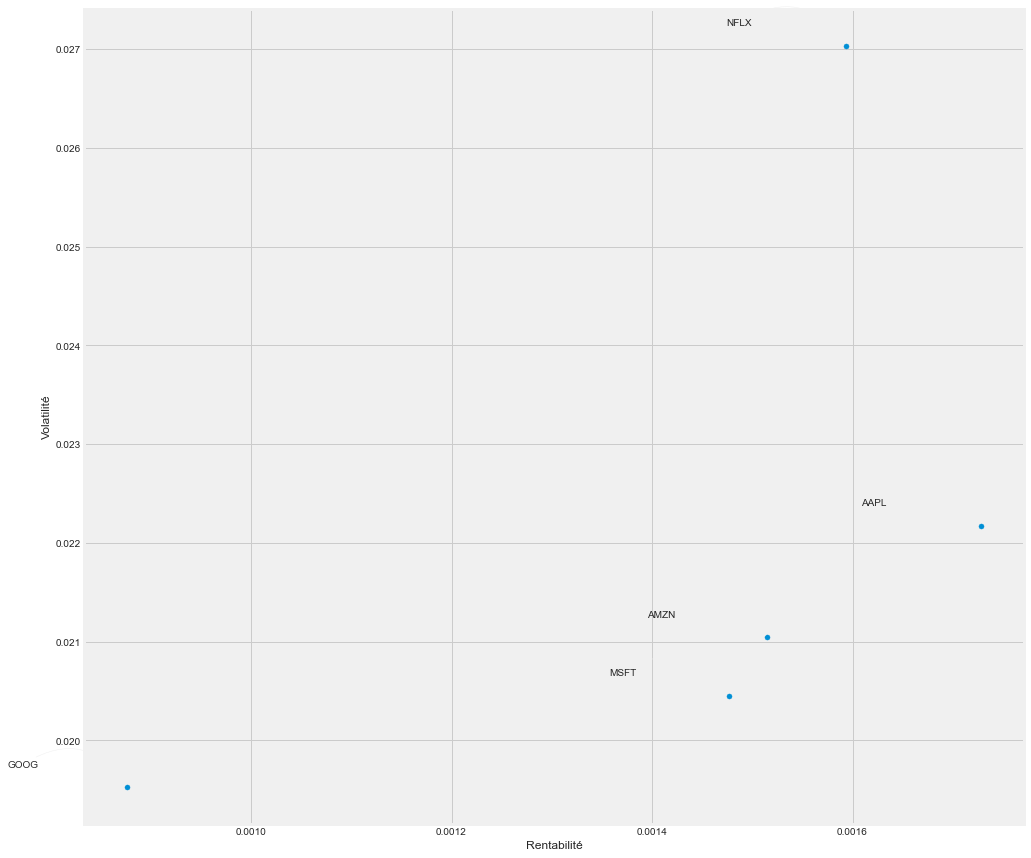

In [66]:
# On classe ces 5 actions en tremes de volatilité (le risque)
# Suppression des valeurs manquantes
Matrendvola = Matrend.dropna()
# Création de la figure 
plt.figure(figsize=(15,15))

plt.scatter(Matrendvola.mean(),Matrendvola.std(),s=25)

plt.xlabel('Rentabilité')
plt.ylabel('Volatilité')

for label,x,y in zip(Matrendvola.columns,Matrendvola.mean(),Matrendvola.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

D'après le graphe on remarque que google est l'actif le moins risqué et le moins rentable tandi que Netflix est le plus rentable est le plus risqué 

On peut déterminer des intervalles de confiance pour la volatilité et déterminer la value at risk 

### Prédiction de la volatilité et de rentabilité 

Dans ce qui suit, on va essayer de déterminer comment varie ces deux mesures dans le future pour les différents 5 actions